In [1]:
from selenium import webdriver
import time

import pandas as pd

## 대기업

In [ ]:
#duty_step2_10016_ly > li:nth-child(1) > label > span > span
#duty_step2_10016_ly > li:nth-child(2)
#duty_step2_10016_ly > li:nth-child(17)

In [76]:
df_nm, df_title, df_career, df_education, df_employment, df_workspace, df_content = [],[],[],[],[],[],[]

In [77]:
# 직무 페이지 열기 
for page in range(1, 251) : 
    print(page)
    driver = webdriver.Chrome('C:/Users/sonso/Desktop/Git/Python/chromedriver.exe')
    try : 
        driver.get(f'https://www.jobkorea.co.kr/recruit/joblist?menucode=local&localorder=1#anchorGICnt_{page}')
        time.sleep(1)
        
        # 직무 탭 선택 
        driver.find_element_by_xpath('//*[@id="devSearchForm"]/div[2]/div/div[1]/dl[1]/dt/p').click()
        
        # IT 직무 선택 
        driver.find_element_by_xpath('//*[@id="devSearchForm"]/div[2]/div/div[1]/dl[1]/dd[2]/div[2]/dl[1]/dd/div[1]/ul/li[3]/label/span').click()
        
        # 세부 직무 전체 선택 
        for i in range(1,18) : 
            driver.find_element_by_css_selector(f'#duty_step2_10016_ly > li:nth-child({i}) > label > span > span').click()

        # 선택 조건으로 검색 
        driver.find_element_by_xpath('//*[@id="dev-btn-search"]').click() 
        time.sleep(2)
        
        # 대기업 선택 
        driver.find_element_by_xpath('//*[@id="anchorGICnt_1"]/li[2]/button').click()
        
        # 전체 리스트 가져오기 
        li = driver.find_element_by_xpath('//*[@id="dev-gi-list"]/div/div[5]/table/tbody')
        
        # 회사 이름 
        li_nm = li.find_elements_by_css_selector('td.tplCo>a')
        li_title = li.find_elements_by_css_selector('td.tplTit > div > strong > a')
        li_etc = li.find_elements_by_css_selector('td.tplTit > div > p.etc')
        
        for j in range(40) : 
            try : 
                df_nm.append(li_nm[j].text)
            except : 
                df_nm.append('')
                
            try : 
                df_title.append(li_title[j].text)
            except : 
                df_title.append('')
                
            
            try :
                df_career.append(li_etc[0].find_elements_by_css_selector('span')[0].text)
            except : 
                df_career.append('')
                
            try : 
                df_education.append(li_etc[0].find_elements_by_css_selector('span')[1].text)
            except : 
                df_education.append('')
                
            try : 
                df_workspace.append(li_etc[0].find_elements_by_css_selector('span')[2].text)
            except : 
                df_workspace.append('')
                
            try : 
                df_employment.append(li_etc[0].find_elements_by_css_selector('span')[3].text)
            except : 
                df_employment.append('')
            
            time.sleep(2)
            
            # 상세페이지 들어가기 
            li_title[j].click()
            time.sleep(3)
            driver.switch_to_window(driver.window_handles[1])
            
            try : 
                driver.switch_to_frame('gib_frame')
                df_content.append(driver.find_element_by_css_selector('body').text)
                driver.switch_to.default_content()
                
            except : 
                df_content.append('')
            driver.close()
            driver.switch_to_window(driver.window_handles[0])
        driver.close()
    except : # 끝 페이지 도달 시 중지
        break

df_big = pd.DataFrame({'nm' : df_nm, 
                   'title' : df_title,
                   'career' : df_career,
                   'education' : df_education,
                   'employment' : df_employment,
                   'workspace' : df_workspace,
                   'content' : df_content})     
        

1


C:\Users\sonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: DeprecationWarning: use driver.switch_to.window instead
C:\Users\sonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: DeprecationWarning: use driver.switch_to.frame instead
C:\Users\sonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: DeprecationWarning: use driver.switch_to.window instead


2
3
4
5


In [145]:
df_big = pd.DataFrame({'nm' : df_nm, 
                   'title' : df_title,
                   'career' : df_career,
                   'education' : df_education,
                   'employment' : df_employment,
                   'workspace' : df_workspace,
                   'content' : df_content}) 

In [148]:
# 중복데이터 제거 
print(df_big.shape)
df_big.drop_duplicates(keep='first', inplace= True)
print(df_big.shape)

(160, 7)
(65, 7)


In [153]:
# 포트폴리오 유무 
df_portfolio = []
for i in range(df_big.shape[0]) : 
# for i in range(10) : 
    try : 
        example = df_big.content[i].split('\n')
        portfolio = 0 
        for j in example : 
            if ('포트폴리오' in j) or ('깃허브' in j )or ('github' in j) or (('프로젝트' in j) and ('경험' in j)): 
                print(j)
                portfolio = 1 
                break 
        df_portfolio.append(portfolio)
    except : 
        df_portfolio.append('')
            
        

M&A(매수측) 프로젝트 경험자
연차보다는 실제 프로젝트 수행 경험 및 역량이 더 중요
(신입) 포트폴리오 제출 /
직무 분야와 관련하여 전문성을 키우기 위해 꾸준히 노력한 경험을 업무나 수행프로젝트 등을 중심으로 서술해주십시오. (2000자 이내)
- 프로젝트 Technical Architect, PL, PM등 업무 유경험자 우대
ㆍ프로젝트 리더 수행 경험자
*** 포트폴리오 제출 필수
POS 프로젝트 참여 경험자
포트폴리오 분석 및 관리
프로젝트 PL 또는 PM, TA 등 수행 경험자
해외 프로젝트 경험 보유자


In [154]:
df_big['portfolio'] = df_portfolio
df_big.portfolio.unique()

array([0, 1, ''], dtype=object)

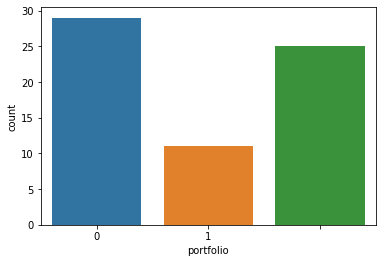

In [155]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
sns.countplot(df_big['portfolio'])
plt.show()